## Data Visualization Project
data: Keplar Exoplanet 

 ------------------  
 ## Code
 import tools and read data

In [1]:
import matplotlib.pyplot as plt
import csv

In [2]:
with open("../data/cumulative.csv") as kepler_file:
    kepler_data=csv.DictReader(kepler_file)
    kepler_list=[]
    for row in kepler_data:
        kepler_list.append(row)

Look at data, make sure it is displaying properly

In [3]:
#kepler_list[0]

### Restructure data
    1. Sort items by Confirmed, Candidate, and False Positive
    2. Select the data which will be visualized

In [4]:
confirmed=[]
candidate=[]
false_positive=[]
#not_dispositioned=[]

for item in kepler_list:
    temp={}
    temp['kepoi_name']=item['kepoi_name']
    temp['koi_disposition']=item['koi_disposition']
    temp['koi_period']=item['koi_period']
    temp['koi_duration']=item['koi_duration']
    if item['koi_duration']!='':
        temp['koi_impact']=item['koi_impact']
    else:
        continue
    if temp['koi_disposition']=='CANDIDATE':        
        candidate.append(temp)
    elif temp['koi_disposition']=='CONFIRMED':
        confirmed.append(temp)
    elif temp['koi_disposition']=='FALSE POSITIVE':
        false_positive.append(temp)
#for some reason there is no data assigned 'not dispositioned'
#     elif temp['koi_disposition']=='NOT DISPOSITIONED':
#         not_dispositioned.append(temp)
    else:
        continue
        

In [5]:
print(len(confirmed))
print(len(candidate))
print(len(false_positive))
#print(len(not_dispositioned))

2293
2248
5023


##### initial analysis
look at the averages to get an idea of how the overall data looks

In [6]:
def averages(ls):
    sum_per=0
    sum_dur=0
    sum_imp=0
    neg_count=0
    for item in ls:
        sum_per+=float(item['koi_period'])
        sum_dur+=float(item['koi_duration'])
        if item['koi_impact']!="":
            sum_imp+=float(item['koi_impact'])
        else:
           neg_count+=1
    avg_per=sum_per/len(ls)
    avg_dur=sum_dur/len(ls)
    avg_imp=sum_imp/(len(ls)-neg_count)
    return(f'Average period={avg_per}   Average duration={avg_dur}   Average impact={avg_imp}')
print(averages(candidate))
print(averages(confirmed))
print(averages(false_positive))   


Average period=130.5238500718243   Average duration=4.827391574733096   Average impact=0.5370909839816927
Average period=27.0632105613249   Average duration=4.308623667684266   Average impact=0.42676675392670144
Average period=73.31222679602584   Average duration=6.576427075452903   Average impact=0.9762938823031301


----------------------------------------------------------------------------------------------  
  
## Data Visualization
1. A function to create graphs
2. Graphs and analysis
3. Conclusion

In [7]:
def create_plot(ls, quality_one, quality_two, quality_three):
    plt.title(f'{quality_one} vs {quality_two} in {quality_three} Kepler Objects')
    plt.xlabel(f'{quality_one}')
    plt.ylabel(f'{quality_two}')
    plt.xticks(rotation=-45)
    
    quality_one=quality_one.lower()
    quality_two=quality_two.lower()

    coordinate_list=[]
    for item in ls:
        if (item[f'koi_{quality_one}']!="" and item[f'koi_{quality_two}']!=""):
            coordinates=tuple((
                float(item[f'koi_{quality_one}']),
                float(item[f'koi_{quality_two}'])
            ))
        coordinate_list.append(coordinates)
    sorted_list1=sorted(coordinate_list, key=lambda x: x[1])
    if (quality_one=='impact' or quality_two=='impact'):
        sorted_list2=sorted(sorted_list1[:-5], key=lambda x: x[0])
    else:
        sorted_list2=sorted(sorted_list1, key=lambda x: x[0])   

    x=[]
    y=[]
    for coordinate in sorted_list2[:-2]: #Initial results revealed a drastic outlier, it has been removed
        x.append(coordinate[0])
        y.append(coordinate[1])

    plt.scatter(x,y)

-------------------------------  
------------------------
# A Brief Introduction
A Kepler object of interest (KOI) is a star observed by the Kepler space telescope that is suspected of hosting one or more transiting planets. 
  
I could not process all the data from each object, that would have been far beyond the bounds of this project, so I settled on three points of data which I thought were easier to understand and provided the most face value insight for kepler objects.  

koi_period = Orbital Period (days):	The interval between consecutive planetary transits.  
koi_duration = Transit Duration (hours):	The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.  
koi_impact = Impact Parameter:	The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius  (I think this means the distance between a star and a planet??)  
  
For an explanation regarding all of the data on kepler objects:  
https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html#:~:text=A%20number%20used%20to%20identify%20and%20track%20a,and%20initially%20consistent%20with%20a%20planetary%20transit%20hypothesis.  
  
By comparing how the relationships between period and duration, period and impact, and duration and impact differ from confirmed kepler objects to candidate kepler objects, to false positive kepler objects, a model could be generated for objects which would most likely be real kepler objects.  This model could be used to rule out large amounts of data and make study on kepler objects more efficient.

--------------------------------------------------  
### Period vs Duration

How does the duration of an observed transit change as the interval between transits changes?

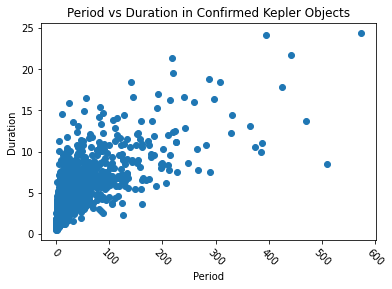

In [8]:
create_plot(confirmed, 'Period','Duration','Confirmed')

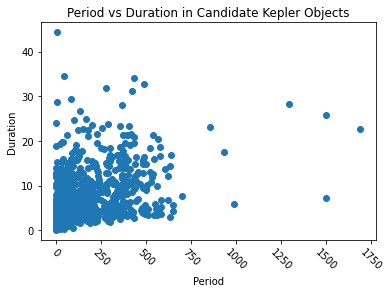

In [9]:
create_plot(candidate,'Period','Duration','Candidate')

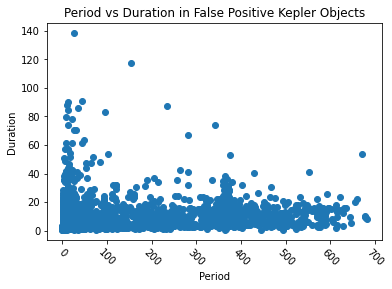

In [10]:
create_plot(false_positive,'Period','Duration','False Positive')

Confirmed:  Positive relationship between period and duration  
Candidate:  Leaning towards positive  
False Positive:  Negative relationship between period and duration  
  
This would seem to indicate that a kepler object is more likely to be a real exoplanet if there is a positive relationship between its period and its duration.  I don't know a lot about exoplanets, but I think that if a planet has a longer period, that has to be because it is either farther from the star or it is moving slower, both of which would cause it to pass in front of the star for longer, which means a longer transit duration.  

------------------------------------------------  
### Period vs Impact  
How does the distnce between a planet and its star change as the interval between transits changes?

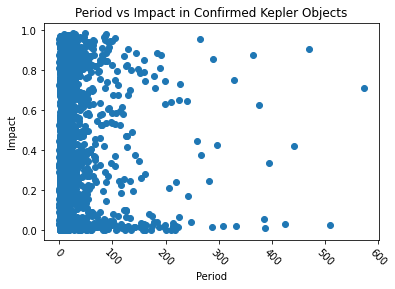

In [11]:
create_plot(confirmed, "Period","Impact","Confirmed")

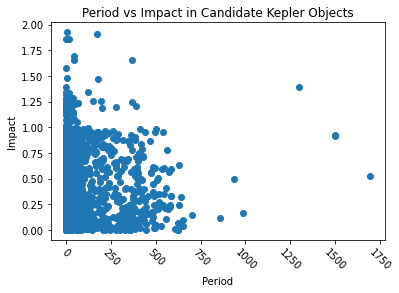

In [12]:
create_plot(candidate,'Period','Impact','Candidate')

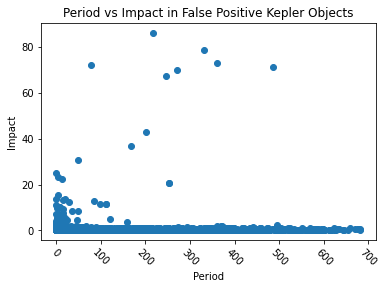

In [13]:
create_plot(false_positive, 'Period','Impact','False Positive')

These graphs do not show quite as clear a trend.  The majority of confirmed kepler objects have a period of less than 100 and an impact of less than 1.  THis contrasts sharply with the data from false positive objects, where there is a significant fraction of the objects which have a period from 200 to 500 and an impact above 5.  The candidate objects show a mix of the two, having a majority within a period of 100 and impact of 1, but also a significant amount of objects lying outside of that range.

--------------------------------------------  
### Duration vs Impact  
How does the distance between a planet and its star change as the duration of its transit changes?

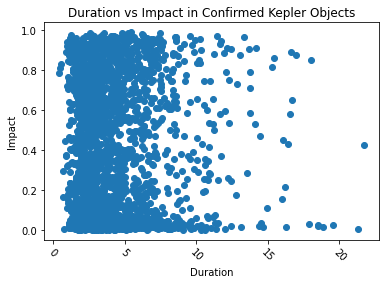

In [14]:
create_plot(confirmed,'Duration','Impact','Confirmed')

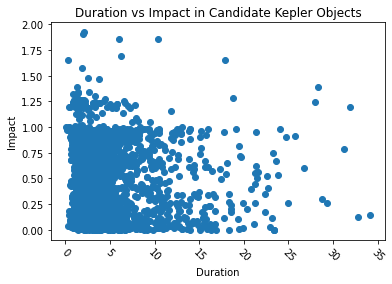

In [15]:
create_plot(candidate,'Duration','Impact','Candidate')

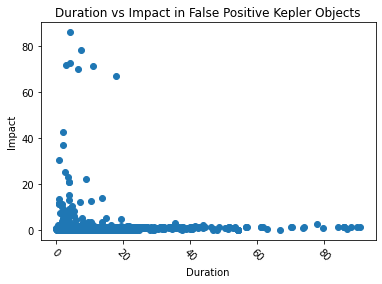

In [16]:
create_plot(false_positive,'Duration','Impact','False Positive')

Again, there is no clear relationship here.  Confirmed objects have a much lower period and impact than false positive objects, while candidate objects have both, evidently because there will be many candidate objects that are false positive objects and many that will be confirmed kepler objects.

---------------------------  
---------------------------  
# Conclusion
There is a clear positive relationship between period and duration for confirmed kepler objects, while false positive objects show a negative relationship.  The relationship is not as clear for candidate objects, which is logical because there are likely many objects that will be false positive or confirmed later on.  There were not any clear relationships between period and impact or duration and impact for any category of object.  This would seem to indicate that the distance a planet is from its star has no bearing on how long its transit is, or how long the interval between its transits is.  While this is not strictly true, the varying size and speed of a planet have a much larger effect on the duration of an object and the period of an object, which means the impact of an object can not be analyzed effectively against qualities such as period and duration without knowing more about the object itself.  
  
The relationship between period and duration means that the longer an object takes to orbit its star, the longer that object will spend passing in front of that star from the view of the earth.  This could be used to rule out objects that spend a long time passing in front of the star, but a relatively short time orbiting the star, or objects that spend a long time orbiting the star but a short time passing in front of it.  While there could be exoplanets which have extreme behaviors such as that, it is more likely to be some other phenomenon, as demonstrated by the negative relationship between period and duration in false positive objects.  
  
While there is a definite lack of relationship between impact and duration and period and duration, there is still some useful insight revealed from the data.  The data from confirmed object would fit inside a subset of the data from candidate objects, which would fit inside a subset of data from the false positive objects.  It is then most likely for candidate objects from that smaller subset of data that matches the confirmed objects to be actual exoplanets.  
  
A model generated from the findings here would likely remove many objects which are actual exoplanets.  The model could be improved by using more than 3 out of 50 columns of data on each object. The other data could be used to help establish a clearer relationship between the impact of a kepler object and its period or relation, by seperating the objects based upon another feature.  It coul also be improved by runnning actual calculations on the data instead of just making graphs and then theorizing from those graphs.  But it is a good starting point to understanding 50 columns of data to graph them and get an idea of what kind of calculations would need to be made. 